# Building the graph

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
def makeUpGraph(graph, df, columns, node_size):
    pos={}
    df.apply(lambda e: pos.update({e[columns[0]]:(e[columns[1]], e[columns[2]])}), axis=1)
    nx.draw(graph, pos,with_labels=True, node_size= node_size, alpha=0.55, cmap= plt.cm.RdPu,
        node_color= np.arange(graph.number_of_nodes()))

def statisticsOfGraph(graph):
    number_of_nodes=len(graph)
    number_of_edges=graph.number_of_edges()
    density=(2*number_of_edges)/(number_of_nodes*(number_of_nodes-1))
    
    return "STATISTICS: \nnumber of node:\t\t"+str(number_of_nodes)+"\nnumber of edges:\t"+str(number_of_edges)+"\ndensity:\t\t"+ str(round(density, 4))

In [3]:
import os
from path import Path
PROJ_DIR = Path().getcwd().parent
DATA_DIR = PROJ_DIR / "data"
os.chdir (PROJ_DIR)

In [4]:
from scripts.src.BuilderGraphWithRtree import BuilderGraphWithRtree

## Cities graph

In [5]:
import json

with open(DATA_DIR/'dpc-covid19-ita-province.json') as f:
         d= json.load(f) 
json.dumps(d)
covid19_dataset=pd.DataFrame(d)

In [6]:
covid19_dataset.drop_duplicates(subset=['denominazione_provincia'],inplace=True)
covid19_dataset = covid19_dataset[covid19_dataset!="In fase di definizione/aggiornamento"]
covid19_dataset=covid19_dataset.dropna()
provincia = covid19_dataset['denominazione_provincia']
lat = covid19_dataset['lat']
long = covid19_dataset['long']
province = pd.DataFrame(data = {'citta': provincia, 'lat': lat, 'long':long})
province.head()



E:\Programmi\Anaconda\envs\MATTEO\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,citta,lat,long
0,Chieti,42.351032,14.167546
1,L'Aquila,42.351222,13.398438
2,Pescara,42.464584,14.213648
3,Teramo,42.658918,13.704400
5,Matera,40.667512,16.597924


In [7]:
builderGraph4=BuilderGraphWithRtree(0.8, province.copy())
P=builderGraph4.buildGraph()

In [8]:
print(statisticsOfGraph(P))

STATISTICS: 
number of node:		107
number of edges:	405
density:		0.0714


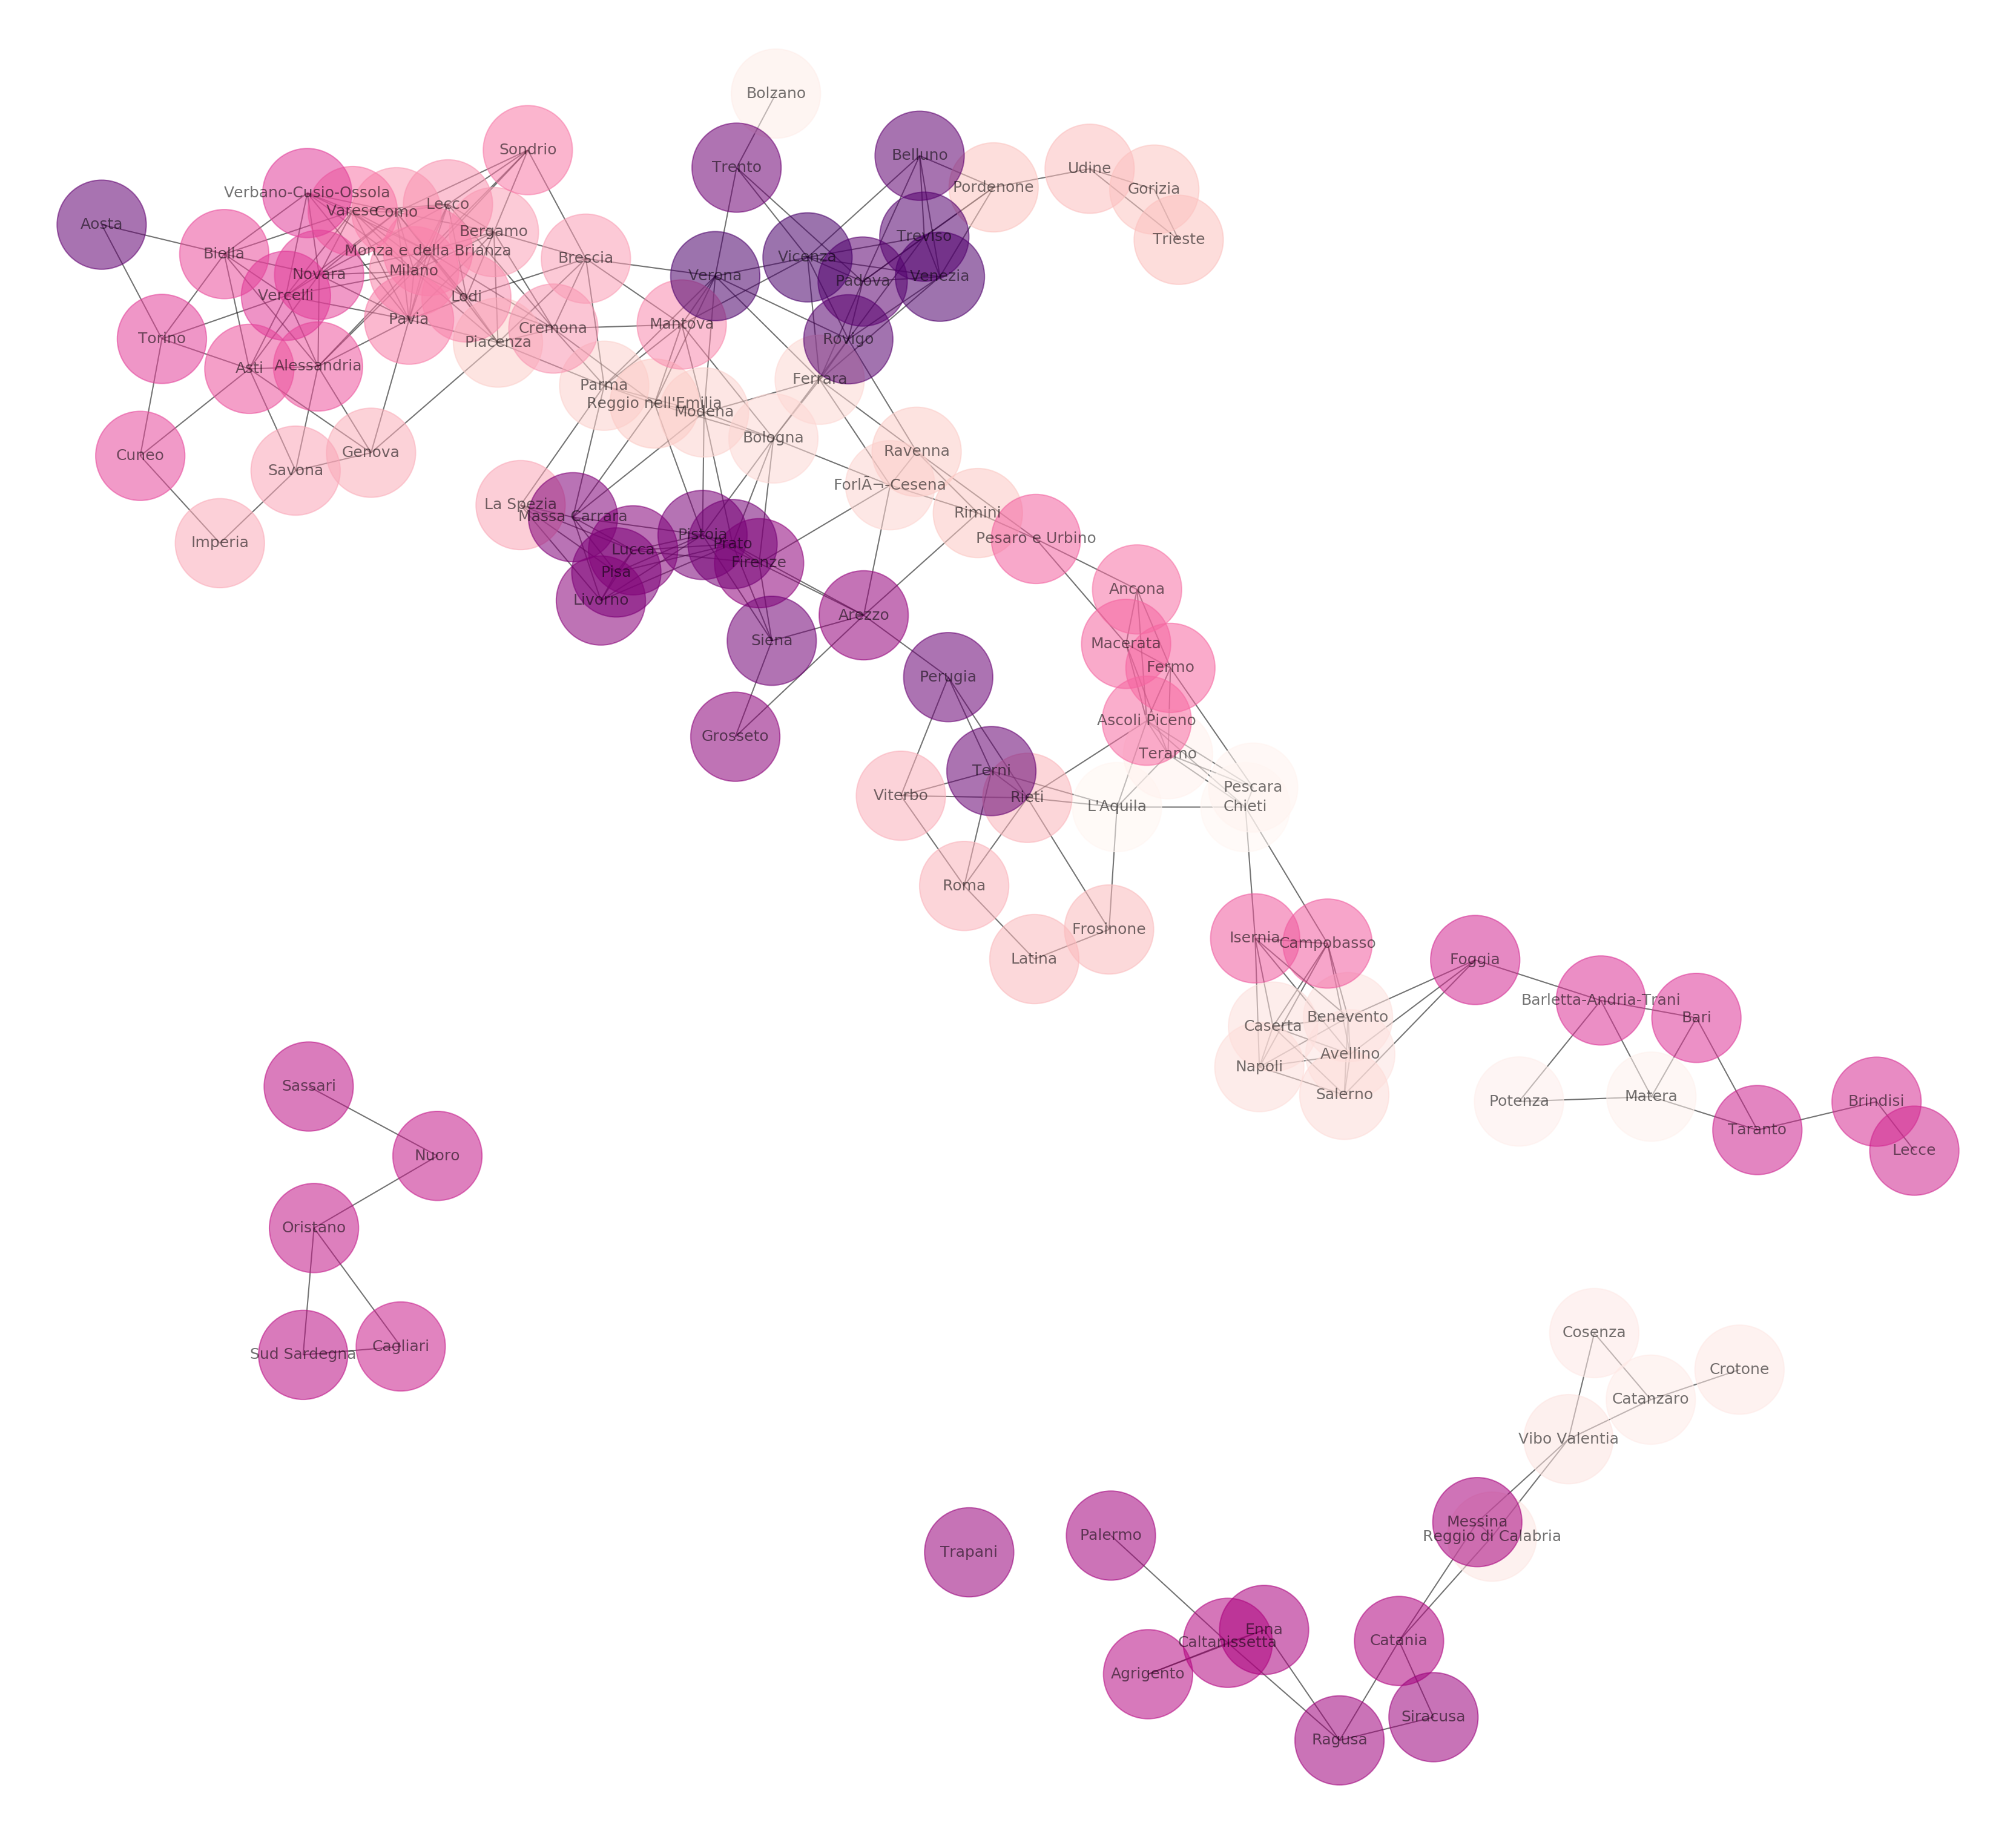

In [9]:
plt.figure(figsize=(22,20), dpi = 150)
makeUpGraph(P,province, ['citta', 'long', 'lat'] , 5000)



In [10]:
%timeit builderGraph4.buildGraph()


8.04 ms ± 57.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Random Dataset

In [11]:
data = np.random.uniform([30,10],[50,20], size=(2000,2))
id=np.array([np.arange(2000)])
data=np.hstack([id.T,data])
data=pd.DataFrame(data, columns=["citta", "long", "lat"])
data.head()


,citta,long,lat
0,0.0,37.490802,19.507143
1,1.0,44.639879,15.986585
2,2.0,33.120373,11.559945
3,3.0,31.161672,18.661761
4,4.0,42.022300,17.080726


In [12]:
builderGraph4=BuilderGraphWithRtree(0.08, data.copy())
R=builderGraph4.buildGraph()

In [13]:
print(statisticsOfGraph(R))

STATISTICS: 
number of node:		2000
number of edges:	2237
density:		0.0011


In [14]:
%timeit builderGraph4.buildGraph()


144 ms ± 7.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Weighted graphs

In [15]:
builderGraph4=BuilderGraphWithRtree(0.8, province.copy())
P_weight=builderGraph4.buildGraph(flag=True)

In [16]:
builderGraph4=BuilderGraphWithRtree(0.08, data.copy())
P_random=builderGraph4.buildGraph(flag=True)


In [17]:
nx.write_adjlist(P,DATA_DIR/"P.adjlist")
nx.write_adjlist(P,DATA_DIR/"P_weight.adjlist")
nx.write_adjlist(P,DATA_DIR/"R.adjlist")
nx.write_adjlist(P,DATA_DIR/"R_weight.adjlist")